In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout, Input, InputLayer
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [14]:
labels: list[str] = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f"X train shape: {x_train.shape}")
print(f"X test shape: {x_test.shape}")

X train shape: (50000, 32, 32, 3)
X test shape: (10000, 32, 32, 3)


cat


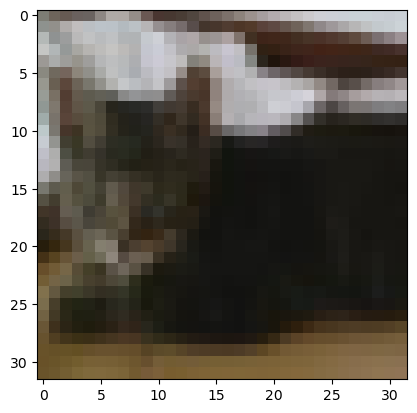

In [16]:
chosen_index = 9
print(labels[y_train[chosen_index][0]])
plt.imshow(x_train[chosen_index])

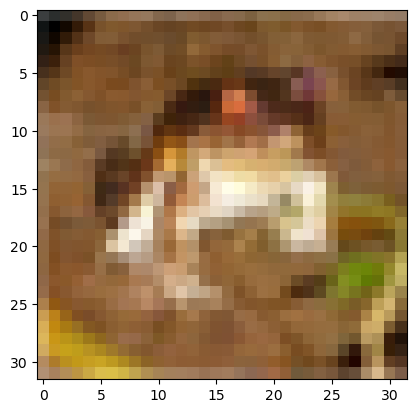

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, len(labels))
y_test = to_categorical(y_test, len(labels))

plt.imshow(x_train[0])

In [50]:
input_shape = (32, 32, 3)

model = Sequential()
model.add(Input(shape=input_shape))

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=input_shape, kernel_initializer="he_normal"))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=input_shape, kernel_initializer="he_normal"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same", input_shape=input_shape, kernel_initializer="he_normal"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same", input_shape=input_shape, kernel_initializer="he_normal"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same", input_shape=input_shape, kernel_initializer="he_normal"))
# model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same", input_shape=input_shape, kernel_initializer="he_normal"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same", input_shape=input_shape, kernel_initializer="he_normal"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same", input_shape=input_shape, kernel_initializer="he_normal"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax", kernel_initializer="he_normal"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [51]:
METRICS = [
    "accuracy",
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=METRICS,
)

In [52]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.00001, monitor="val_loss", patience=10, restore_best_weights=True, mode="min"
)

batch_size = 32

model.fit(
    x_train,
    y_train,
    epochs=1_000,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
    batch_size=batch_size
)

model.save("model_cifar10_e1000_v4.keras")

Epoch 1/1000
 181/1563 [==>...........................] - ETA: 1:11 - loss: 2.2175 - accuracy: 0.1749 - precision: 0.2547 - recall: 0.0071

KeyboardInterrupt: 

## Testing

In [39]:
test_model = tf.keras.models.load_model("model_cifar10_e1000_v3.keras")


313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

    airplane       0.84      0.79      0.81      1000
  automobile       0.92      0.89      0.91      1000
        bird       0.78      0.67      0.72      1000
         cat       0.61      0.65      0.63      1000
        deer       0.76      0.77      0.77      1000
         dog       0.72      0.69      0.71      1000
        frog       0.81      0.86      0.83      1000
       horse       0.82      0.85      0.83      1000
        ship       0.84      0.92      0.88      1000
       truck       0.88      0.89      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

0.7969


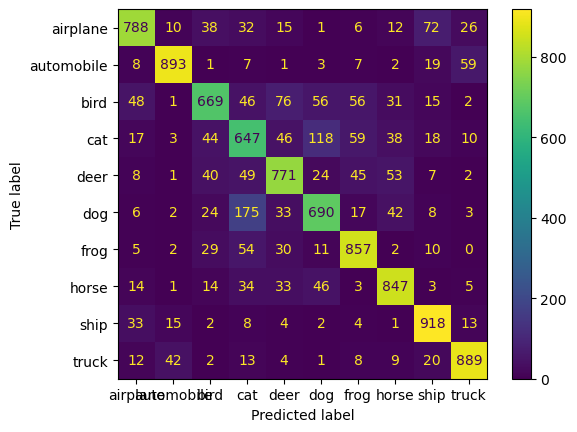

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score

y_pred = test_model.predict(x_test)

y_pred = np.argmax(y_pred, axis=1)

y_test_report = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_report, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

print(classification_report(y_test_report, y_pred, target_names=labels))
print(accuracy_score(y_test_report, y_pred))

plt.show()




In [49]:
test_model = tf.keras.models.load_model("model_cifar10_e1000_v3.keras", compile=True)

print(test_model.history)

None


TypeError: float() argument must be a string or a real number, not 'History'

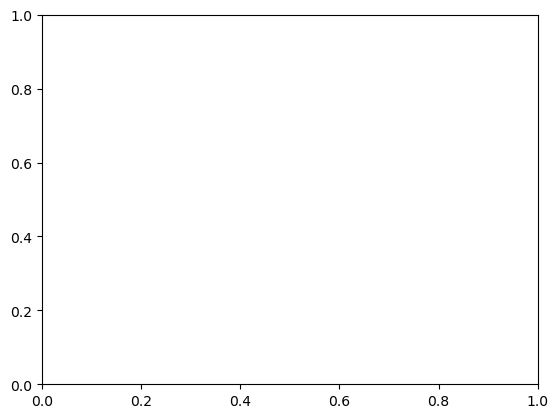

In [21]:
plt.plot(test_model.history)
plt.plot(test_model.history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()